In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import scipy.io as sio
import math

%matplotlib inline

## Helper functions

In [2]:
def load_data(path, col_name):
    """
    Load input data from matlab file.
    
    Parameters
    ----------
    path : String
        The relative path of matlab file    
    col_name : String
        Label of the input data within the
        file
    
    Returns
    -------
    Pandas DataFrame
        Contains the input data
    """
    data = sio.loadmat(path)
    data = pd.DataFrame(data['Y'])
    
    return data

## PCA and Kernel-PCA

In [3]:
def pca(X, d):
    """
    Performs Principal Component Analysis on the
    given data to reduce its dimensions.
    
    Parameters
    ----------
    X : D x N matrix
        where N is the number of data points and
        D is the ambient dimension
    d : Integer
        Dimensionality of the low-dimensional
        representation
    
    Returns
    -------
    D x d matrix
        The basis of the low-dimensional subspace
    1 x d matrix
        The mean of the subspace
    d x N matrix
        The low dimensional representation of the
        input data
    """
    X = X.T

    # Do mean normalization
    M_X = np.sum(X, axis = 0)
    M_X = M_X / X.shape[0]
    X = X - M_X

    # Find the correlation matrix
    C = (X.T * X) / X.shape[0]

    # Do eigenvalue decomposition and get hold of 
    # the eigenvalues (D) and eigenvectors (V) of 
    # covariance matrix
    D, V = np.linalg.eig(C)
    
    print(D.argsort())

    # Extract the top-d eigenvectors
    V = V[:, 0:d]
    
    # Represent data in this basis
    Y = X * V
    
    # Calculate the mean of low-dimensional space
    M_Y = np.sum(Y, axis=0) / Y.shape[0]
    
    return V.T, M_Y, Y.T

def kernel_pca(K, d):
    """
    Performs kernel-PCA on the given data for
    dimensionality reduction.
    
    Parameters
    ----------
    K : N x N matrix
        where N is the number of data points
        The kernel matrix
    d : Integer
        Dimensionality of the low dimensional
        representation
    
    Returns
    -------
    d X N matrix
        The low dimensional representation of
        the data
    """
    
    # Initialize a column vector of 1's with
    # N rows
    ones = np.matrix(np.ones(K.shape[0])).T
    
    # Initialize a N x N identity matrix
    I = np.identity(K.shape[0])
    
    # Calculate (I - (1 * 1.T) / N)
    partial = I - ((ones * ones.T) / K.shape[0])
    
    # Compute K hat
    K_hat = partial * K * partial
    
    # Do eigenvalue decomposition and get hold of 
    # the eigenvalues (D) and eigenvectors (V) of 
    # covariance matrix
    D, V = np.linalg.eig(K_hat)
    
    # Extract the top-d eigenvectors
    V = V[:, 0:d]
    
    # Represent data in this low-dimensional 
    # basis and return it
    return K * V

[12 14 18 19 22 23 24 25 26 27 28 29 30 31 32 33 36 38 39 37 35 34 21 20 17
 16 15 13 11 10  9  8  7  6  5  4  3  2  1  0]
(2, 200)


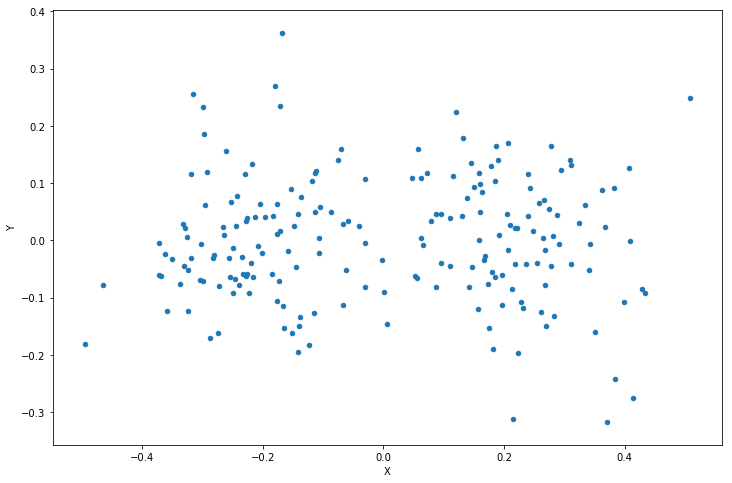

In [4]:
data = load_data("HW3_Data/dataset1.mat", 'Y')
X = np.matrix(data.values)
U, mean, Y = pca(X, 2)

print(Y.shape)

u = pd.DataFrame(Y[0:2, :].T, columns=['X', 'Y'])
u.plot(kind="scatter", x='X', y='Y', figsize=(12, 8))

In [5]:
t1 = np.matrix([[0, 1, 1],
                [2, 3, 3],
                [4, 5, 3]])

kernel_pca(t1, 2)

"""
t2 = np.sum(t1, axis=1)
t2 = t2/t1.shape[1]
print(t2)

t1 = t1 - t2
print(t1[0:2, :].T)
"""

'\nt2 = np.sum(t1, axis=1)\nt2 = t2/t1.shape[1]\nprint(t2)\n\nt1 = t1 - t2\nprint(t1[0:2, :].T)\n'

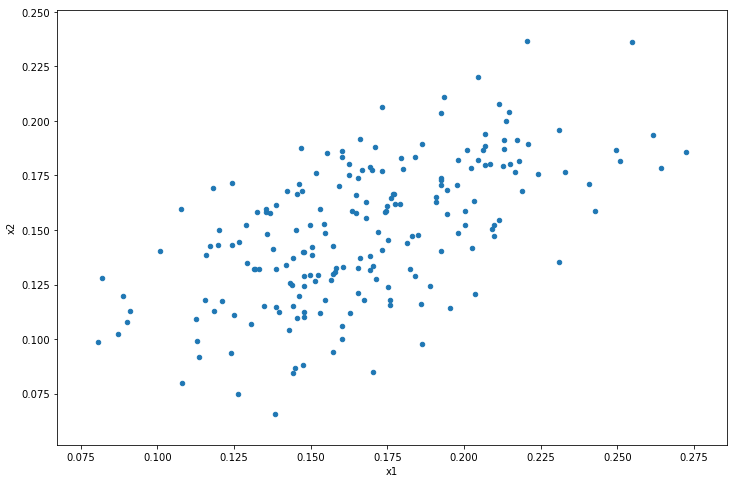

In [6]:
X = np.matrix(data.values)
X = pd.DataFrame(X[0:2, :].T, columns=['x1', 'x2'])
X.plot(kind="scatter", x='x1', y='x2', figsize=(12, 8))

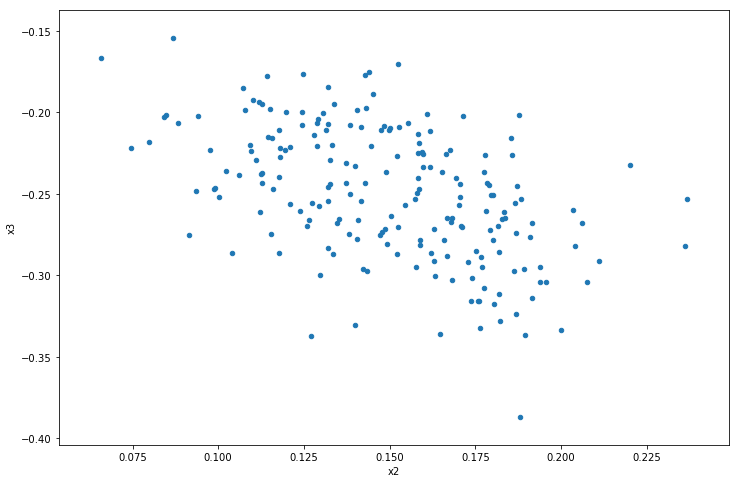

In [7]:
X = np.matrix(data.values)
M = np.matrix([X[1, :].getA1(), X[2, :].getA1()])

X = pd.DataFrame(M.T, columns=['x2', 'x3'])
X.plot(kind="scatter", x='x2', y='x3', figsize=(12, 8))